# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('/content/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('/content/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('/content/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('/content/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('/content/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_hh_income.shape

(2535, 14)

In [ ]:
df_hh_income.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
df_hh_income.isnull().values.any()

True

In [ ]:
df_pct_poverty.shape

(29329, 3)

In [ ]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [ ]:
df_pct_poverty.isnull().values.any()

False

In [ ]:
df_pct_completed_hs.shape

(29329, 3)

In [ ]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [ ]:
df_pct_completed_hs.isnull().values.any()

False

In [ ]:
df_share_race_city.shape

(29268, 7)

In [ ]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [ ]:
df_share_race_city.isnull().values.any()

False

In [ ]:
df_fatalities.shape

(2535, 14)

In [ ]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
df_fatalities.isnull().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [5]:
df_hh_income.replace(np.nan, 0)

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,0
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [6]:
df_fatalities.replace(np.nan, 0)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [7]:
df_pct_completed_hs.replace(np.nan, 0)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [8]:
df_pct_poverty.replace(np.nan, 0)

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [9]:
df_share_race_city.replace(np.nan, 0)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [ ]:
df_hh_income.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2530    False
2531    False
2532    False
2533    False
2534    False
Length: 2535, dtype: bool

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].replace(['-'],'0')

In [ ]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])

In [ ]:
pct_pr = df_pct_poverty.groupby(['City', 'poverty_rate'], as_index=False).agg({'poverty_rate':pd.Series.unique})
pct_pr.sort_values('poverty_rate', ascending=False, inplace=True)

In [ ]:
pr_bar = px.bar(x = pct_pr.City,
                     y = pct_pr.poverty_rate,
                     color = pct_pr.poverty_rate,
                     title='The Poverty Rate in each US State')
 
pr_bar.update_layout(xaxis_title='Name of the States', 
                          yaxis_title='Poverty Rate')
pr_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
completed_hspr = df_pct_completed_hs.groupby(['City', 'percent_completed_hs'], as_index=False).agg({'percent_completed_hs':pd.Series.unique})
completed_hspr.sort_values('percent_completed_hs', ascending=False, inplace=True)

In [ ]:
hspr_bar = px.bar(x = completed_hspr.City,
                     y = completed_hspr.percent_completed_hs,
                     color = completed_hspr.percent_completed_hs,
                     title='The High School Completed Percentage Rate in each US State')
 
hspr_bar.update_layout(xaxis_title='Name of the States', 
                          yaxis_title='Completed Percentage Rate')
hspr_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
df_pr_hsr = pd.DataFrame(df_pct_poverty['poverty_rate'])
df_pr_hsr['completed_hs'] = completed_hspr['percent_completed_hs']
df_pr_hsr.replace(np.nan, 0)

,poverty_rate,completed_hs
0,78.80,92.2
1,29.10,83.1
2,25.50,21.2
3,30.70,69.1
4,42.00,69.4
...,...,...
29324,18.60,0
29325,15.30,0
29326,5.90,0
29327,5.40,0


In [ ]:
df_pr_hsr['completed_hs'] = df_pr_hsr['completed_hs'].replace(['-'],'0')
df_pr_hsr.replace(np.nan, 0)

,poverty_rate,completed_hs
0,78.80,92.2
1,29.10,83.1
2,25.50,21.2
3,30.70,69.1
4,42.00,69.4
...,...,...
29324,18.60,0
29325,15.30,0
29326,5.90,0
29327,5.40,0


In [ ]:
df_pr_hsr.dropna()

,poverty_rate,completed_hs
0,78.80,92.2
1,29.10,83.1
2,25.50,21.2
3,30.70,69.1
4,42.00,69.4
...,...,...
29275,27.90,93.5
29276,0.00,72.4
29277,1.50,91.7
29278,11.20,85


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

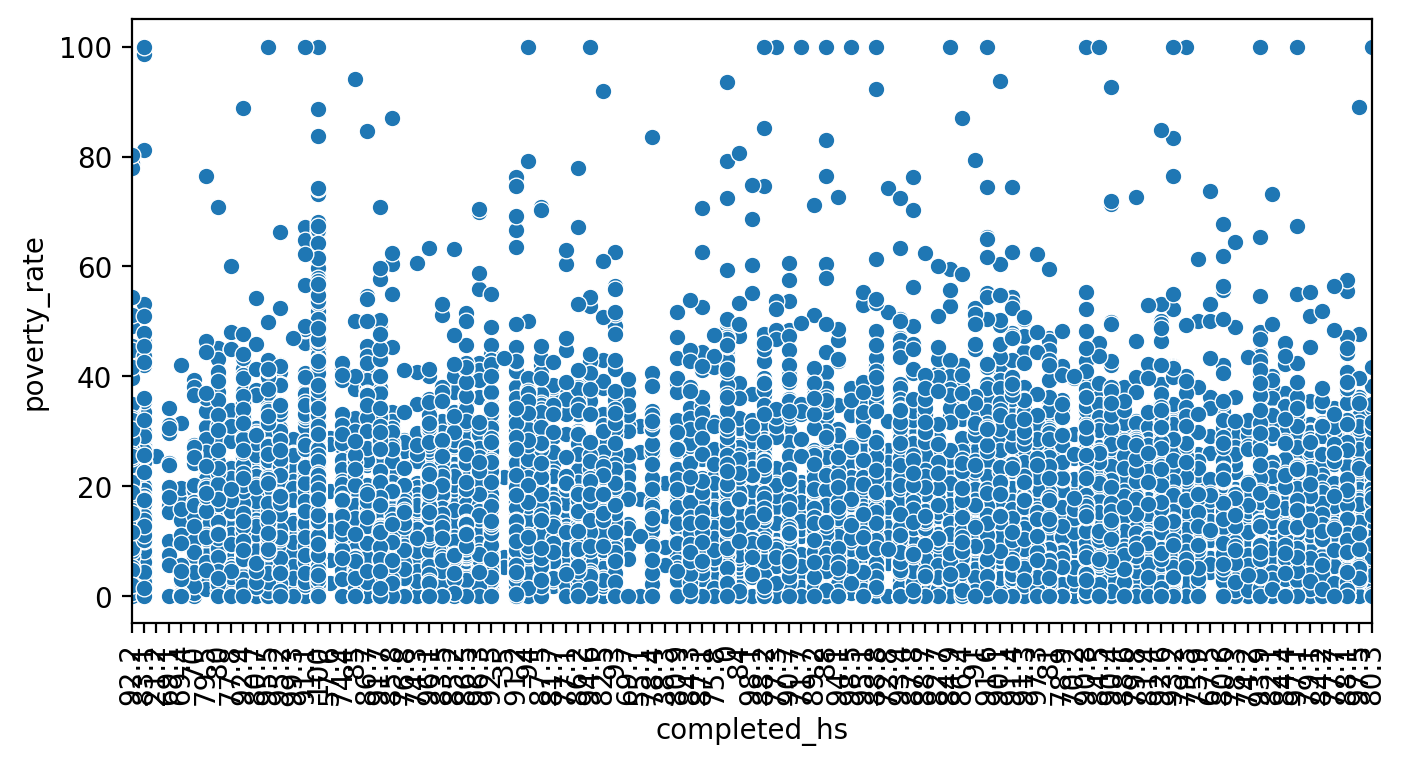

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=df_pr_hsr,
                     x='completed_hs', 
                     y='poverty_rate')
ax = plt.xticks(rotation=90)
ax = plt.xlim(0, 100)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

UFuncTypeError: ignored

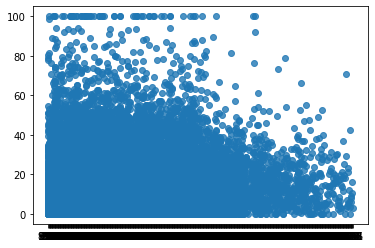

In [ ]:
ax = sns.regplot(data=df_pr_hsr, x='completed_hs', y='poverty_rate')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [ ]:
df_share_race_city['City'].unique

<bound method Series.unique of 0                    Abanda CDP
1                Abbeville city
2               Adamsville city
3                  Addison town
4                    Akron town
                  ...          
29263    Woods Landing-Jelm CDP
29264              Worland city
29265               Wright town
29266                Yoder town
29267             Y-O Ranch CDP
Name: City, Length: 29268, dtype: object>

In [ ]:
df_share_race_city = df_share_race_city.replace(['(X)'],'0')

In [ ]:
df_share_race_city["share_white"] = pd.to_numeric(df_share_race_city["share_white"], downcast="float")
df_share_race_city["share_black"] = pd.to_numeric(df_share_race_city["share_black"], downcast="float")
df_share_race_city["share_native_american"] = pd.to_numeric(df_share_race_city["share_native_american"], downcast="float")
df_share_race_city["share_asian"] = pd.to_numeric(df_share_race_city["share_asian"], downcast="float")
df_share_race_city["share_hispanic"] = pd.to_numeric(df_share_race_city["share_hispanic"], downcast="float")

In [ ]:
share_race = df_share_race_city.groupby(['Geographic area', 'share_white',	'share_black',	'share_native_american',	'share_asian',	'share_hispanic'], as_index=False).agg({'Geographic area':pd.Series.unique})
share_race

,share_white,share_black,share_native_american,share_asian,share_hispanic,Geographic area
0,0.00,0.00,0.00,0.00,0.00,AK
1,0.00,0.00,98.50,0.00,0.00,AK
2,0.00,0.00,100.00,0.00,0.00,AK
3,0.40,0.00,99.40,0.00,0.00,AK
4,1.00,0.00,95.20,0.00,0.00,AK
...,...,...,...,...,...,...
28334,100.00,0.00,0.00,0.00,1.90,WY
28335,100.00,0.00,0.00,0.00,3.90,WY
28336,100.00,0.00,0.00,0.00,5.00,WY
28337,100.00,0.00,0.00,0.00,6.50,WY


In [ ]:
share_race[['Geographic area', 'share_white',	'share_black',	'share_native_american',	'share_asian',	'share_hispanic']].plot(x='Geographic area', kind='bar', rot=90)

Error in callback <function flush_figures at 0x7f81d652e320> (for post_execute):


KeyboardInterrupt: ignored

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities.dropna()

In [ ]:
kills_by_race =df_fatalities.race.value_counts()
kills_by_race

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [ ]:
fig = px.pie(labels=kills_by_race.index,
values=kills_by_race.values,
title="Kills by Race",
names=kills_by_race.index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
df_fatalities.dropna()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.00,M,B,Marion,AR,False,undetermined,Not fleeing,False
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
death_cmp = df_fatalities.groupby(['city', 'gender'], 
                               as_index=False).agg({'id': pd.Series.count})
death_cmp

,city,gender,id
0,Abbeville,M,1
1,Abilene,M,1
2,Abingdon,M,1
3,Acworth,M,1
4,Addison,M,1
...,...,...,...
1468,Yuba City,M,1
1469,Yulee,M,1
1470,Yuma,F,1
1471,Zanesville,M,1


In [ ]:
v_bar_split = px.bar(x = death_cmp.city,
                     y = death_cmp.id,
                     color = death_cmp.gender,
                     title='Deaths compared to Men and Women')
 
v_bar_split.update_layout(xaxis_title='Name of the City', 
                          yaxis_title='IDs')
v_bar_split.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
box = px.box(df_fatalities,
             y='age',
             x='manner_of_death',
             color='gender',
             notched=True,
             points='all',
             title='Manner of Deaths by Age')
 
box.update_layout(yaxis=dict(type='log'))
 
box.show()

# Yes, the death of men is higher than Women by both manner of death

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
kills_by_armed = df_fatalities.armed.value_counts()
kills_by_armed

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

In [ ]:
fig = px.pie(labels=kills_by_armed.index,
values=kills_by_armed.values,
title="Kills by armed",
names=kills_by_armed.index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

In [ ]:
armed_by = ['gun', 'unarmed']
armed = df_fatalities[df_fatalities['armed'].isin(armed_by)]
armed

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.00,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.00,M,H,Chandler,AZ,False,attack,Car,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,2806,TK TK,26/07/17,shot,gun,NaN,M,NaN,San Antonio,TX,False,attack,Not fleeing,False
2524,2816,Jerauld Phillip Hammond II,27/07/17,shot,gun,46.00,M,NaN,Los Angeles,CA,False,other,Not fleeing,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False


In [ ]:
v_bar_split = px.bar(x = armed.city,
                     y = armed.armed,
                     color = armed.armed,
                     title='People armed with guns and unarmed')
 
v_bar_split.update_layout(xaxis_title='Name of the City', 
                          yaxis_title='IDs')
v_bar_split.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
df_fatalities['age'].dropna()
killed_percentage = len(df_fatalities[df_fatalities['age'] < 25]) / len(df_fatalities['age']) * 100
print(f"People killed were under 25 years old is {killed_percentage} %")

People killed were under 25 years old is 17.75147928994083 %


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [ ]:
ages_of_peapole_killed = df_fatalities.groupby('age').agg({'age':pd.Series.unique})
ages_of_peapole_killed

,age
age,
6.0,6.0
12.0,12.0
13.0,13.0
14.0,14.0
15.0,15.0
...,...
80.0,80.0
82.0,82.0
83.0,83.0


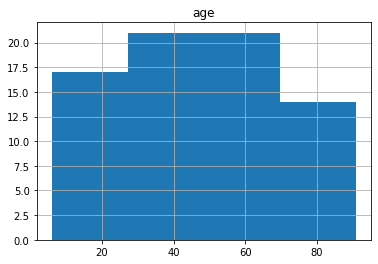

In [ ]:
hist = ages_of_peapole_killed.hist(bins=4)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [ ]:
df_fatalities = df_fatalities.dropna()

In [ ]:
age_by_race = df_fatalities.groupby('age').agg({'age':pd.Series.unique})
age_by_race

,age
age,
6.0,6.0
12.0,12.0
13.0,13.0
14.0,14.0
15.0,15.0
...,...
79.0,79.0
80.0,80.0
82.0,82.0


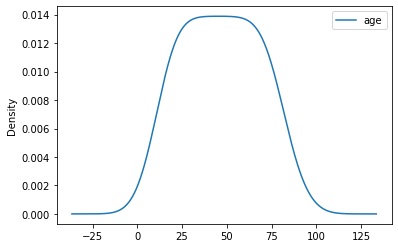

In [ ]:
ax = age_by_race.plot.kde()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [ ]:
killed_by_race = df_fatalities.groupby('race').agg({'race':pd.Series.count})
killed_by_race

,race
race,
A,36
B,592
H,401
N,29
O,28
W,1168


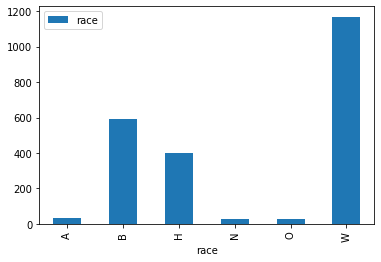

In [ ]:
ax = killed_by_race.plot.bar()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
ment_ill = ['True']
mentip = df_fatalities.loc[df_fatalities['signs_of_mental_illness'].isin(ment_ill)]
mentip

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera


In [ ]:

mental_illness_percentage = len(mentip) / len(df_fatalities['signs_of_mental_illness']) * 100
print(f"People killed by police have been diagnosed with a mental illness is {mental_illness_percentage} %")

People killed by police have been diagnosed with a mental illness is 0.0 %


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
top_cities = df_fatalities['city'].value_counts().head(n=10)

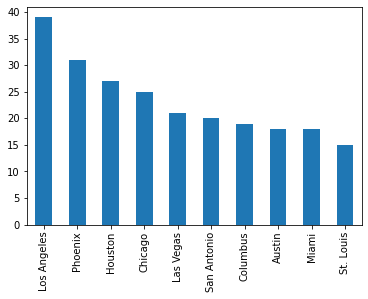

In [ ]:
ax = top_cities.plot.bar()

#Los Angeles is the most dangerous city

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [23]:
states = ['LA', 'KI', 'TX', 'IL', 'NV', 'TX', 'OH', 'TX', 'FL', 'MO']
top_cities = df_fatalities['city'].value_counts().head(n=10).rename_axis('City').reset_index(name='Count')
top_cities['State'] = states
top_cities

,City,Count,State
0,Los Angeles,39,LA
1,Phoenix,31,KI
2,Houston,27,TX
3,Chicago,25,IL
4,Las Vegas,21,NV
5,San Antonio,20,TX
6,Columbus,19,OH
7,Austin,18,TX
8,Miami,18,FL
9,St. Louis,15,MO


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [24]:
states = ['LA', 'KI', 'TX', 'IL', 'NV', 'TX', 'OH', 'TX', 'FL', 'MO']
top_cities = df_fatalities['city'].value_counts().head(n=10).rename_axis('City').reset_index(name='Count')
top_cities['State'] = states
top_cities

,City,Count,State
0,Los Angeles,39,LA
1,Phoenix,31,KI
2,Houston,27,TX
3,Chicago,25,IL
4,Las Vegas,21,NV
5,San Antonio,20,TX
6,Columbus,19,OH
7,Austin,18,TX
8,Miami,18,FL
9,St. Louis,15,MO


In [27]:
world_map = px.choropleth(top_cities,
                          locations='State',
                          color='City', 
                          hover_name='City', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [36]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

In [ ]:
df_fatalities['year'] = df_fatalities['date'].dt.year
df_fatalities['year']

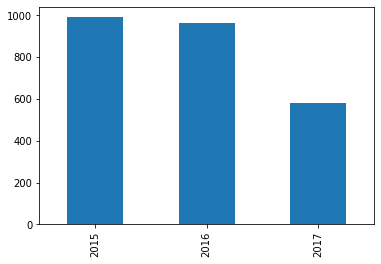

In [42]:
kills_over_time = df_fatalities['year'].value_counts()
ax = kills_over_time.plot.bar()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).